In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [7]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
p_data=data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
p_data=pd.get_dummies(p_data,drop_first=True)

In [11]:
p_data['Total_Year']=2020-p_data['Year']

In [12]:
p_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Total_Year
0,2014,3.35,5.59,27000,0,0,1,0,1,6
1,2013,4.75,9.54,43000,0,1,0,0,1,7
2,2017,7.25,9.85,6900,0,0,1,0,1,3
3,2011,2.85,4.15,5200,0,0,1,0,1,9
4,2014,4.60,6.87,42450,0,1,0,0,1,6


In [13]:
p_data=p_data.drop(['Year'],axis=True)

In [14]:
co=p_data.corr()

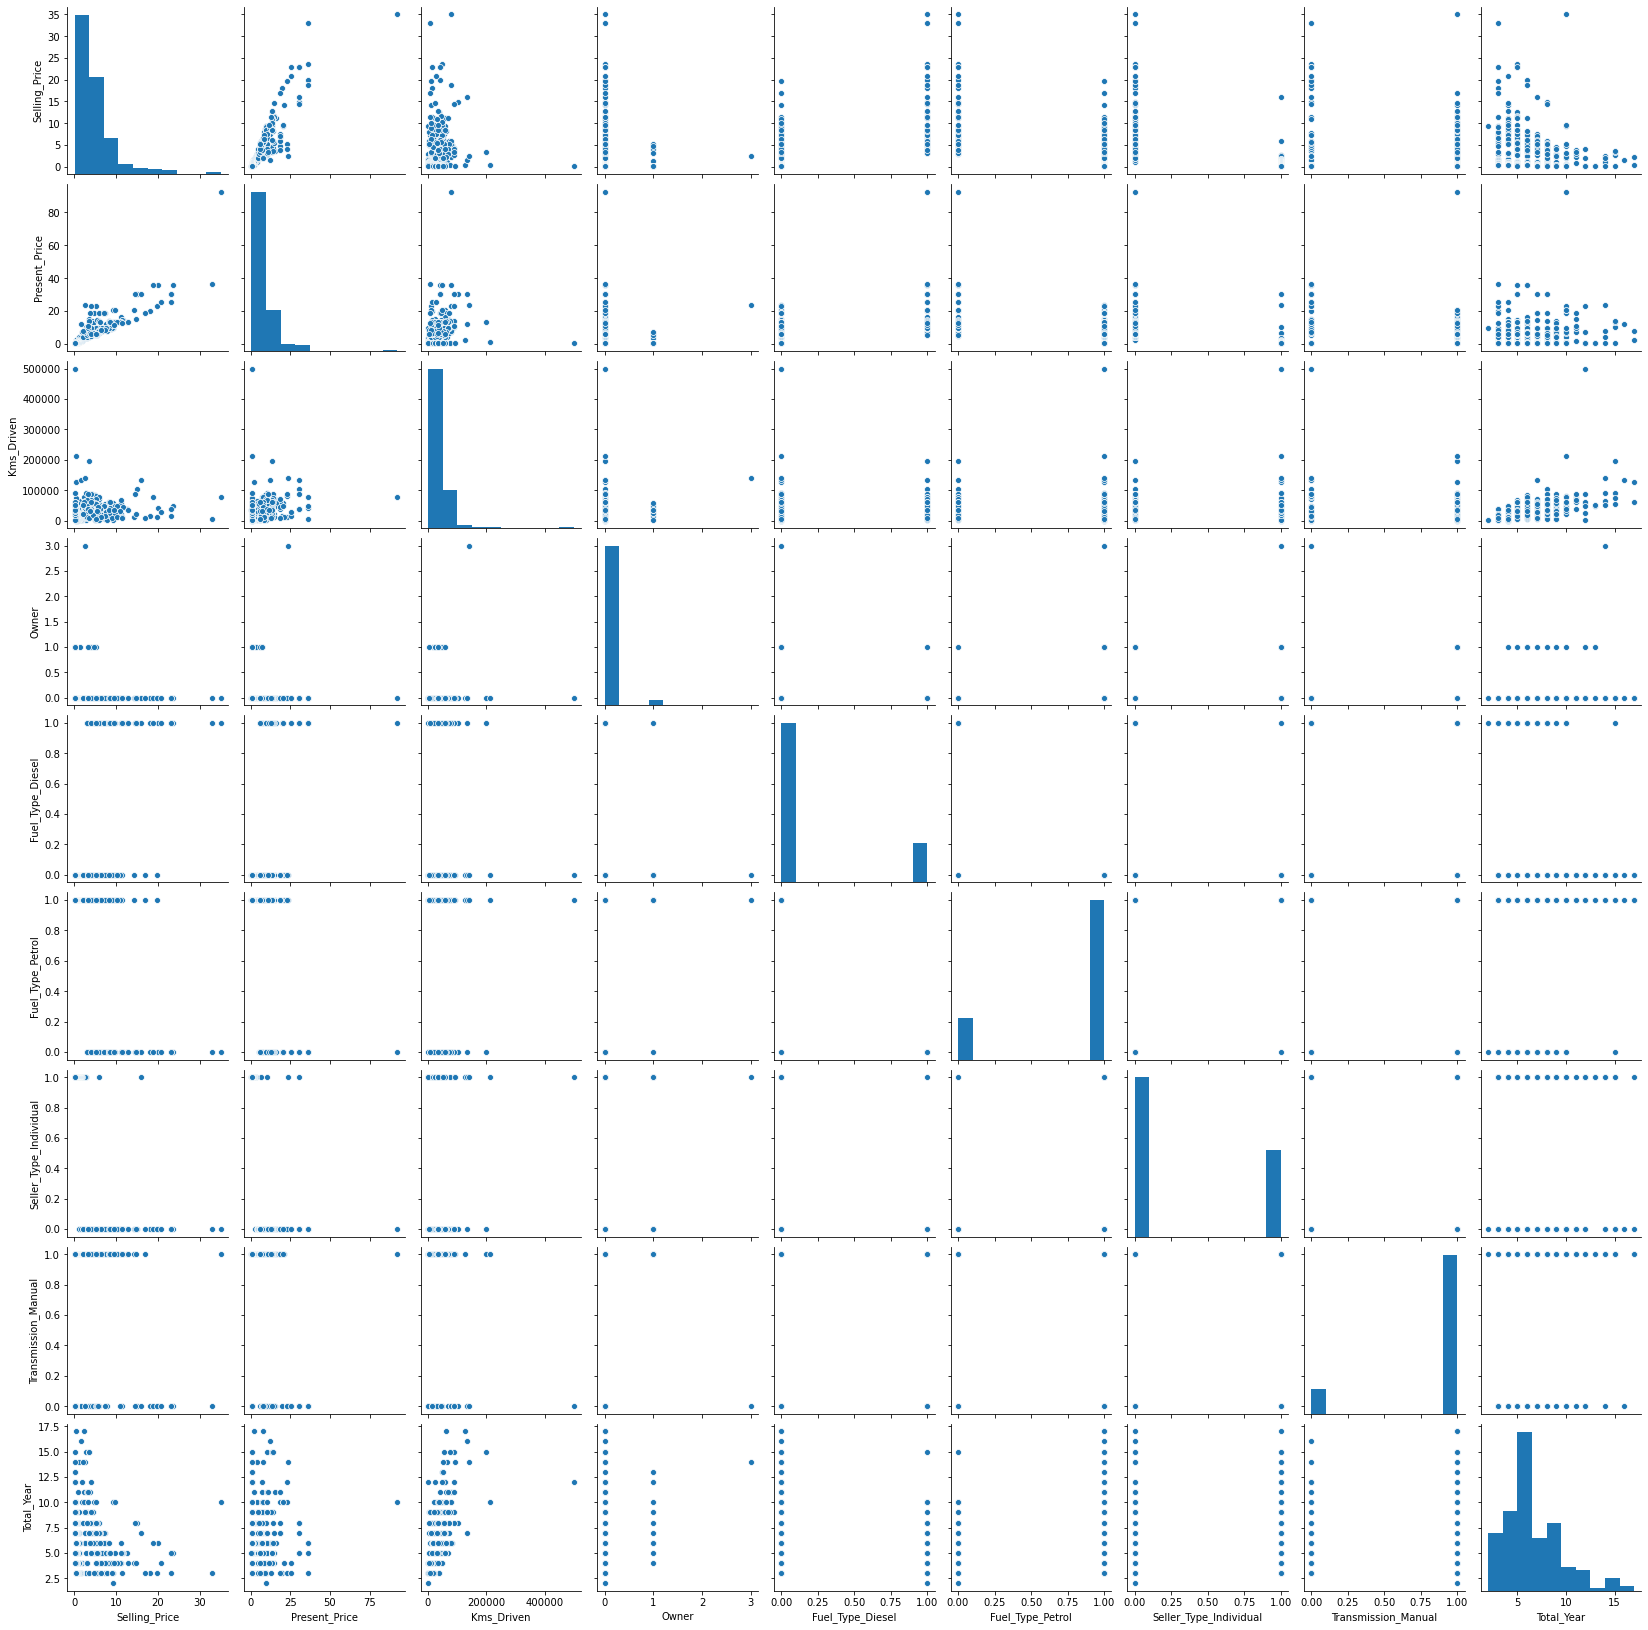

In [15]:
sns.pairplot(p_data)

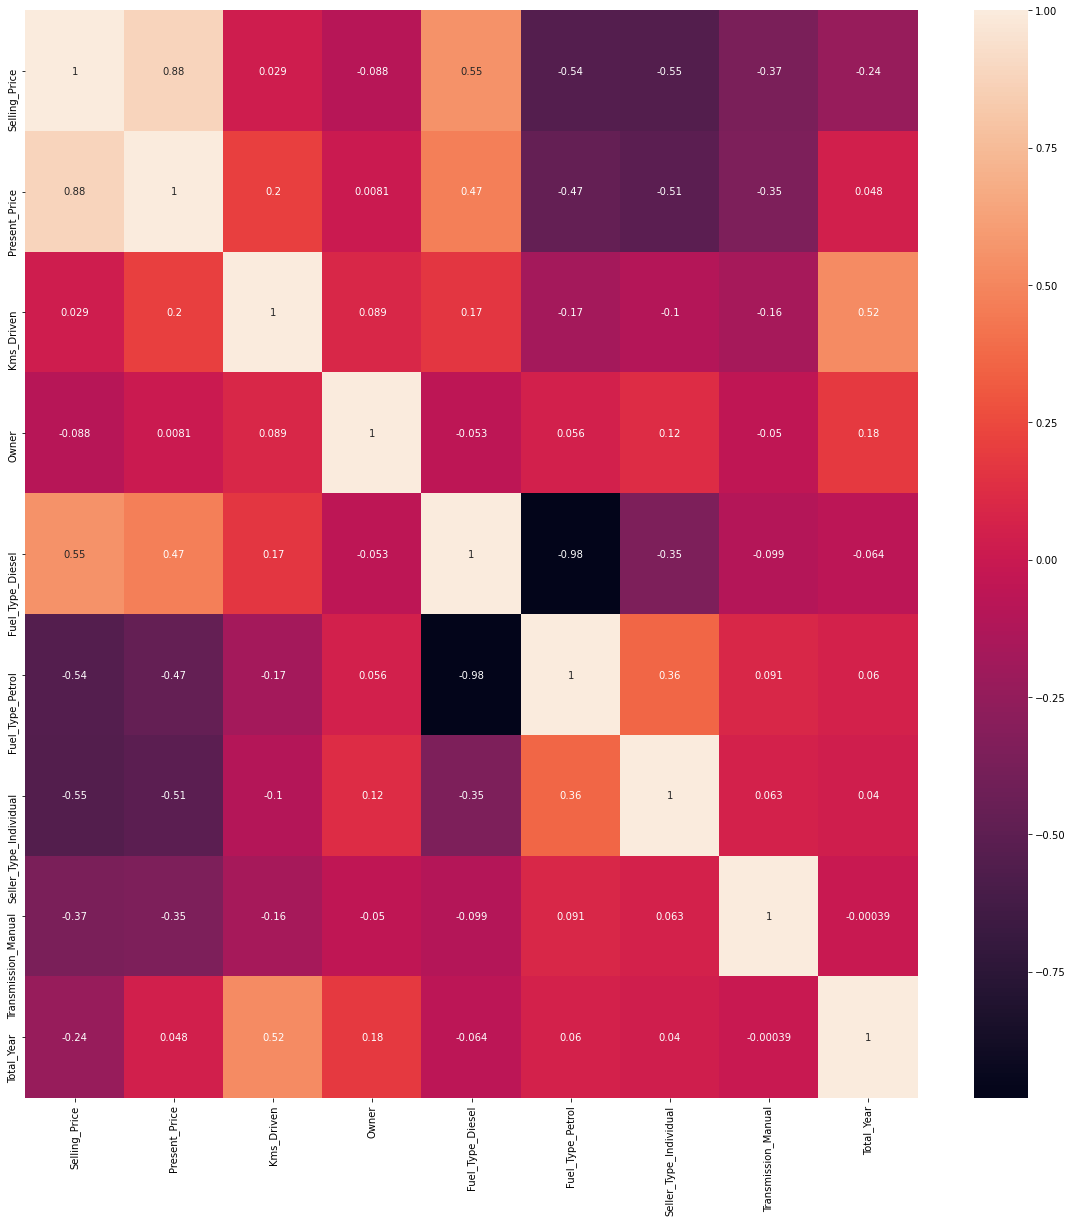

In [17]:
top=co.index
plt.figure(figsize=(20,20))
g=sns.heatmap(p_data[top].corr(),annot=True)

In [18]:
X=p_data.iloc[:,1:]
y=p_data.iloc[:,0]

In [19]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [20]:
model=ExtraTreesRegressor()
model.fit(X,y)
model.feature_importances_

array([0.36800441, 0.04198234, 0.0008294 , 0.23372242, 0.0088182 ,
       0.12980317, 0.14387261, 0.07296744])

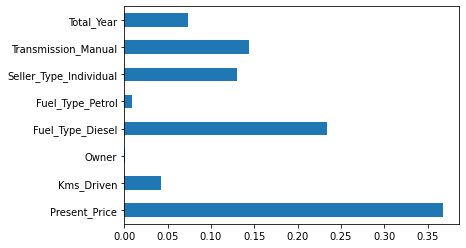

In [21]:
feat=pd.Series(model.feature_importances_,index=X.columns)
feat.plot(kind='barh')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [23]:
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [24]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test.shape

(61, 8)

In [26]:
rf=RandomizedSearchCV(cv=5,estimator=model,param_distributions=random_grid,n_jobs=1,random_state=5,n_iter=20,scoring='neg_mean_squared_error')

In [27]:
rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [28]:
p=rf.predict(X_test)

In [29]:
p

array([ 2.58738547,  0.62064984,  3.03789164, 18.31337098,  9.48154378,
       11.0855681 ,  2.26871928,  0.31897021,  5.85584749,  0.30249492,
        0.54377282,  5.08439166,  7.43094751,  1.05329007,  0.57066634,
        0.39795232,  3.85985707,  0.41251867,  6.34187346,  4.65911028,
        0.28239798,  9.7178438 ,  0.59056002,  7.25051947,  5.24543866,
        5.84494462,  0.77536767,  0.18149502,  4.49258633,  6.67607931,
        8.41592896,  4.63386505,  0.57555322,  0.75564445,  6.60943392,
        1.13495815,  3.68594373, 22.00891941,  0.68235233,  4.75223398,
        8.5096444 ,  0.30084865,  2.00085134,  0.44477364,  8.42800002,
        5.43735716,  0.46773896,  7.89224078,  0.31457723,  0.56669046,
        0.60139802,  4.30461049,  2.87367395,  1.01311051, 20.22791334,
        6.12600823,  9.44091592,  3.67749219,  1.08408027,  0.65940725,
        0.26695249])

In [30]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

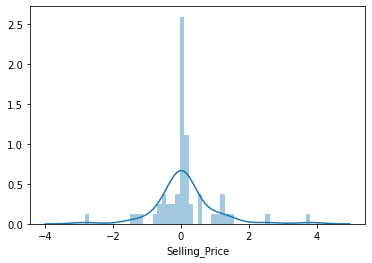

In [31]:
sns.distplot(p-y_test)

In [37]:
import pickle
file=open('model.pkl','wb')
pickle.dump(rf,file)